In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
df = pd.read_csv("googleplaystore.csv")

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
# missing data 

In [7]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
df["Reviews"].value_counts()

Reviews
0         596
1         272
2         214
3         175
4         137
         ... 
342912      1
4272        1
5517        1
4057        1
398307      1
Name: count, Length: 6002, dtype: int64

In [9]:
#df["Reviews"] = df["Reviews"].astype(int)

In [11]:
df["Reviews"].str.isnumeric().sum()

np.int64(10840)

In [12]:
df[~df["Reviews"].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [13]:
df_clean = df.copy()

In [16]:
df_clean = df_clean.drop(df_clean.index[10472])

In [18]:
df_clean["Reviews"].str.isnumeric().sum()

np.int64(10840)

In [21]:
df_clean["Reviews"] = df_clean["Reviews"].astype(int)

In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [23]:
df_clean.describe()

,Rating,Reviews
count,9366.000000,1.084000e+04
mean,4.191757,4.441529e+05
std,0.515219,2.927761e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.477550e+04
max,5.000000,7.815831e+07


In [24]:
df_clean["Size"].value_counts()

Size
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
430k                     1
429k                     1
200k                     1
460k                     1
619k                     1
Name: count, Length: 461, dtype: int64

In [25]:
df_clean.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [26]:
df_clean["Size"] = df_clean["Size"].str.replace("M", "000")
df_clean["Size"] = df_clean["Size"].str.replace("k", "")

In [27]:
df_clean.Size.unique()

array(['19000', '14000', '8.7000', '25000', '2.8000', '5.6000', '29000',
       '33000', '3.1000', '28000', '12000', '20000', '21000', '37000',
       '2.7000', '5.5000', '17000', '39000', '31000', '4.2000', '7.0000',
       '23000', '6.0000', '6.1000', '4.6000', '9.2000', '5.2000', '11000',
       '24000', 'Varies with device', '9.4000', '15000', '10000',
       '1.2000', '26000', '8.0000', '7.9000', '56000', '57000', '35000',
       '54000', '201', '3.6000', '5.7000', '8.6000', '2.4000', '27000',
       '2.5000', '16000', '3.4000', '8.9000', '3.9000', '2.9000', '38000',
       '32000', '5.4000', '18000', '1.1000', '2.2000', '4.5000', '9.8000',
       '52000', '9.0000', '6.7000', '30000', '2.6000', '7.1000', '3.7000',
       '22000', '7.4000', '6.4000', '3.2000', '8.2000', '9.9000',
       '4.9000', '9.5000', '5.0000', '5.9000', '13000', '73000', '6.8000',
       '3.5000', '4.0000', '2.3000', '7.2000', '2.1000', '42000',
       '7.3000', '9.1000', '55000', '23', '6.5000', '1.5000', '7

In [28]:
df_clean["Size"] = df_clean["Size"].replace("Varies with device", np.nan)

In [29]:
df_clean.Size.unique()

array(['19000', '14000', '8.7000', '25000', '2.8000', '5.6000', '29000',
       '33000', '3.1000', '28000', '12000', '20000', '21000', '37000',
       '2.7000', '5.5000', '17000', '39000', '31000', '4.2000', '7.0000',
       '23000', '6.0000', '6.1000', '4.6000', '9.2000', '5.2000', '11000',
       '24000', nan, '9.4000', '15000', '10000', '1.2000', '26000',
       '8.0000', '7.9000', '56000', '57000', '35000', '54000', '201',
       '3.6000', '5.7000', '8.6000', '2.4000', '27000', '2.5000', '16000',
       '3.4000', '8.9000', '3.9000', '2.9000', '38000', '32000', '5.4000',
       '18000', '1.1000', '2.2000', '4.5000', '9.8000', '52000', '9.0000',
       '6.7000', '30000', '2.6000', '7.1000', '3.7000', '22000', '7.4000',
       '6.4000', '3.2000', '8.2000', '9.9000', '4.9000', '9.5000',
       '5.0000', '5.9000', '13000', '73000', '6.8000', '3.5000', '4.0000',
       '2.3000', '7.2000', '2.1000', '42000', '7.3000', '9.1000', '55000',
       '23', '6.5000', '1.5000', '7.5000', '51000', 

In [30]:
df_clean["Size"] = df_clean["Size"].astype(float)

In [31]:
df_clean["Size"]

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10840, dtype: float64

In [32]:
df_clean.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [33]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


In [34]:
df_clean.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19000.0,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [35]:
df_clean["Installs"].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [36]:
df_clean["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [37]:
df_clean["Price"].value_counts()

Price
0         10040
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$19.90        1
$1.75         1
$14.00        1
$4.85         1
$1.04         1
Name: count, Length: 92, dtype: int64

In [38]:
df_clean["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [39]:
chars_to_remove = ["+", ",", "$"]
cols_to_clean = ["Installs", "Price"]

In [40]:
for item in chars_to_remove: 
    for cols in cols_to_clean: 
        df_clean[cols] = df_clean[cols].str.replace(item, "")

In [41]:
df_clean["Price"].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [42]:
df_clean["Installs"].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [43]:
df_clean["Price"] = df_clean["Price"].astype(float)

In [44]:
df_clean["Installs"] = df_clean["Installs"].astype(float)

In [45]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  float64
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.2+ MB


In [46]:
df_clean.describe()

,Rating,Reviews,Size,Installs,Price
count,9366.000000,1.084000e+04,9145.000000,1.084000e+04,10840.000000
mean,4.191757,4.441529e+05,19579.419913,1.546434e+07,1.027368
std,0.515219,2.927761e+06,24042.062020,8.502936e+07,15.949703
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,5.600000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,13000.000000,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,30000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


In [47]:
df_clean.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [48]:
df_clean["Last Updated"]

0         January 7, 2018
1        January 15, 2018
2          August 1, 2018
3            June 8, 2018
4           June 20, 2018
               ...       
10836       July 25, 2017
10837        July 6, 2018
10838    January 20, 2017
10839    January 19, 2015
10840       July 25, 2018
Name: Last Updated, Length: 10840, dtype: object

In [49]:
df_clean["Last Updated"].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [50]:
df_clean["Last Updated"] = pd.to_datetime(df_clean["Last Updated"])

In [51]:
df_clean.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [52]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  float64       
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 1.2+ MB


In [53]:
df_clean["Day"] = df_clean["Last Updated"].dt.day
df_clean["Month"] = df_clean["Last Updated"].dt.month
df_clean["Year"] = df_clean["Last Updated"].dt.year

In [54]:
df_clean.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [55]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  float64       
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  Day             10840 non-null  int32         
 14  Month           10840 non-null  int32         
 15  Year   

In [56]:
# EDA 

In [57]:
df_clean.duplicated("App")

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
Length: 10840, dtype: bool

In [58]:
df_clean[df_clean.duplicated("App")]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000.0,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,26,2,2018
236,Box,BUSINESS,4.2,159872,NaN,10000000.0,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device,31,7,2018
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000.0,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up,24,7,2018
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000.0,10000000.0,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up,20,7,2018
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000.0,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up,16,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4,100000.0,Free,0.0,Mature 17+,Dating,2016-02-25,2.2,4.0 and up,25,2,2016
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0,1000000.0,Free,0.0,Everyone,Communication,2018-07-06,5.2,5.0 and up,6,7,2018
10730,FP Notebook,MEDICAL,4.5,410,60000.0,50000.0,Free,0.0,Everyone,Medical,2018-03-24,2.1.0.372,4.4 and up,24,3,2018
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12000.0,1000000.0,Free,0.0,Everyone,Shopping,2018-07-30,3.9,4.4 and up,30,7,2018


In [62]:
df_clean = df_clean.drop_duplicates(subset = ["App"], keep = 'first')

In [63]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          8196 non-null   float64       
 3   Reviews         9659 non-null   int64         
 4   Size            8432 non-null   float64       
 5   Installs        9659 non-null   float64       
 6   Type            9658 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9651 non-null   object        
 12  Android Ver     9657 non-null   object        
 13  Day             9659 non-null   int32         
 14  Month           9659 non-null   int32         
 15  Year    

In [68]:
numeric_features = [feature for feature in df_clean.columns if df_clean[feature].dtype != 'O']
categorical_features = [feature for feature in df_clean.columns if df_clean[feature].dtype == 'O']

In [69]:
print(numeric_features)

['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'Day', 'Month', 'Year']


In [70]:
print(categorical_features)

['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


<Figure size 1500x1000 with 0 Axes>

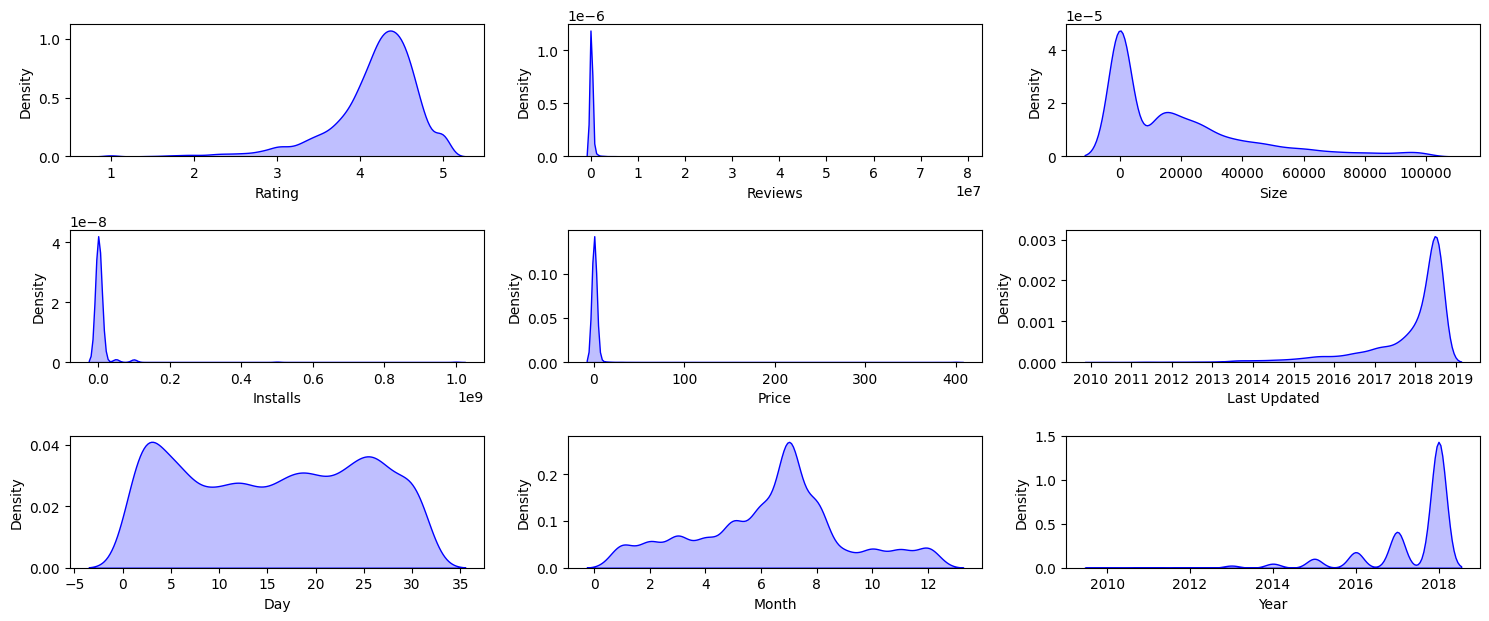

In [76]:
plt.figure(figsize = (15,10))

for i in range(0, len(numeric_features)): 
    plt.subplot(5,3,i+1)
    sns.kdeplot(x = df_clean[numeric_features[i]], color = "b", fill = True)
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
plt.show()

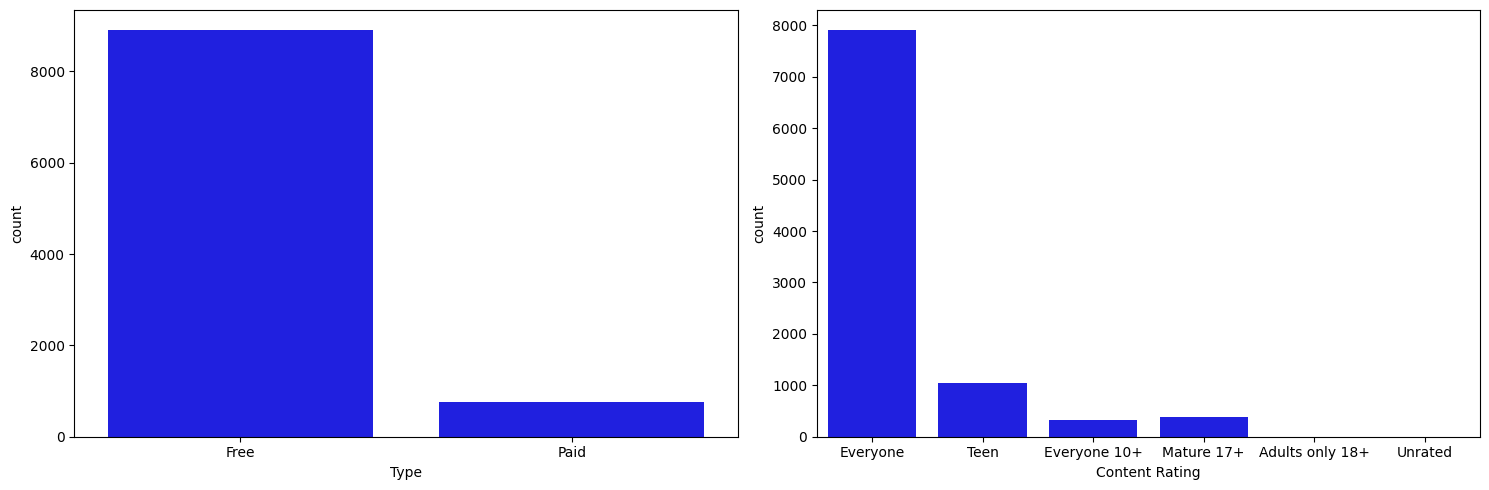

In [80]:
plt.figure(figsize = (15,5))
category = ["Type", "Content Rating"]

for i in range(0, len(category)): 
    plt.subplot(1,2,i+1)
    sns.countplot(x = df_clean[category[i]], color = "b")
    plt.xlabel(category[i])
    plt.tight_layout()
plt.show()

In [81]:
df_clean.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [82]:
df_clean["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [83]:
df_clean["Category"].value_counts()

Category
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: count, dtype: int64

<Figure size 4000x2000 with 0 Axes>

<Figure size 4000x2000 with 0 Axes>

<Figure size 4000x2000 with 0 Axes>

<Figure size 4000x2000 with 0 Axes>

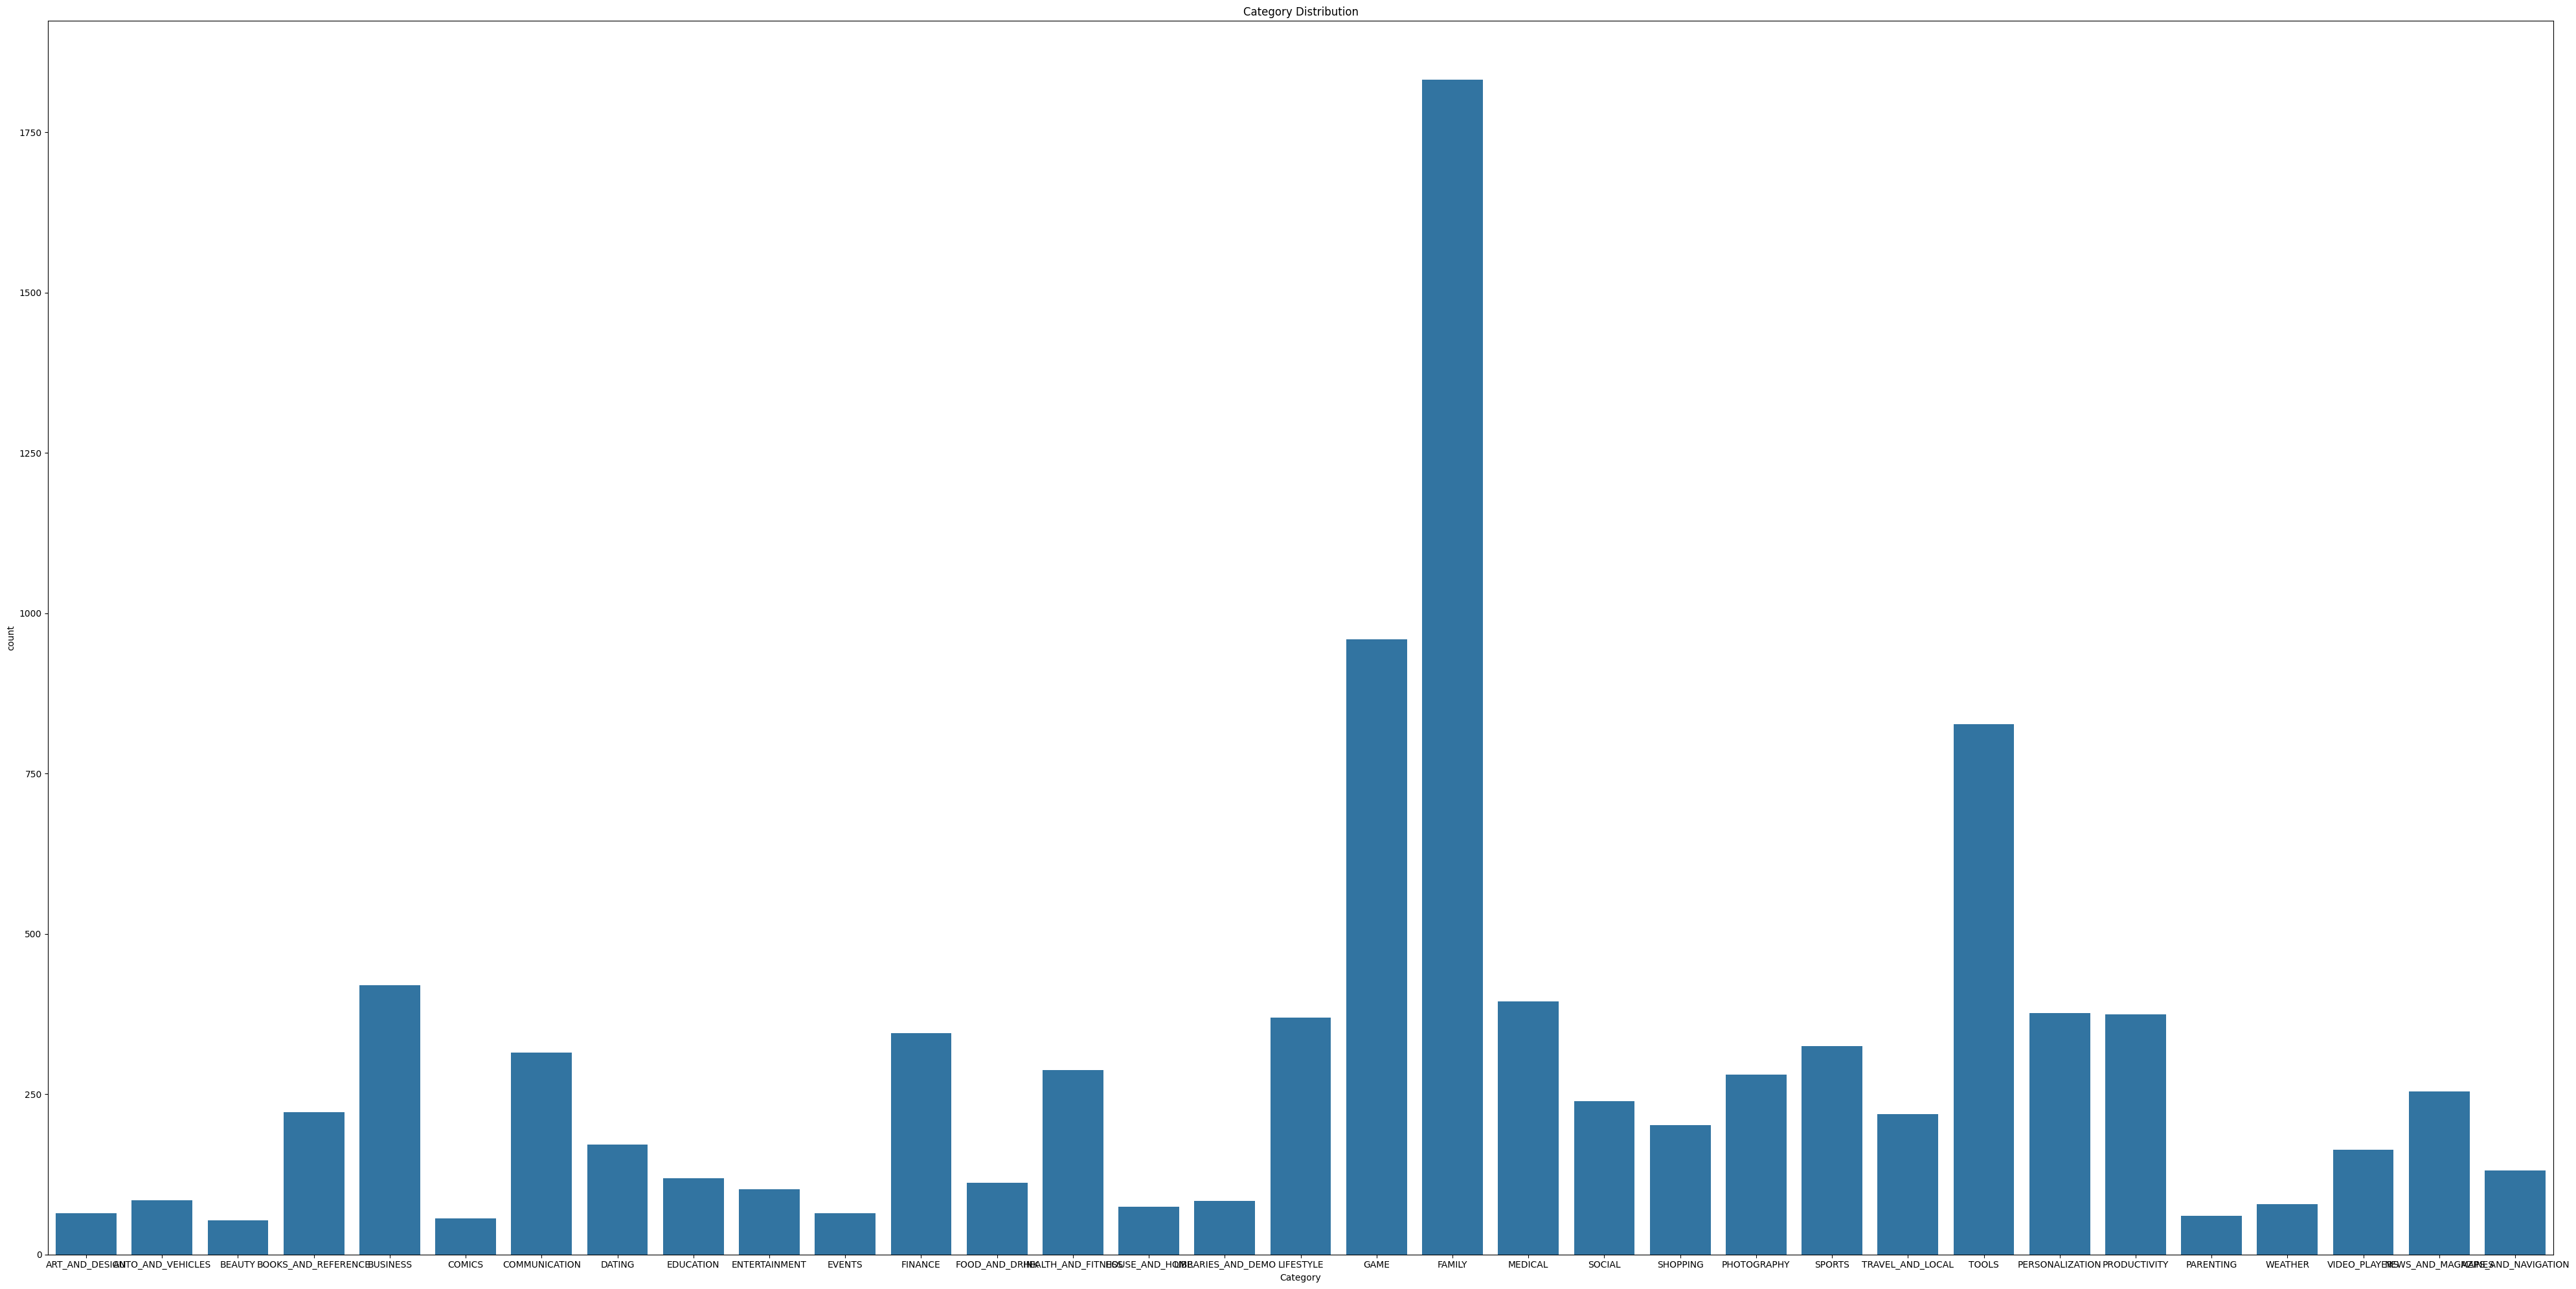

In [98]:
plt.figure(figsize = (40,20))
sns.countplot(data = df_clean, x =  df_clean["Category"])
plt.title("Category Distribution")
plt.tight_layout()
plt.show()

In [99]:
# top app categories by installment

In [100]:
df_clean.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [104]:
df_clean.groupby(["Category"])["Installs"].sum().sort_values(ascending = False)

Category
GAME                   1.387892e+10
COMMUNICATION          1.103828e+10
TOOLS                  8.001772e+09
PRODUCTIVITY           5.793091e+09
SOCIAL                 5.487868e+09
PHOTOGRAPHY            4.649148e+09
FAMILY                 4.427942e+09
VIDEO_PLAYERS          3.926903e+09
TRAVEL_AND_LOCAL       2.894887e+09
NEWS_AND_MAGAZINES     2.369218e+09
ENTERTAINMENT          2.113660e+09
BOOKS_AND_REFERENCE    1.665970e+09
PERSONALIZATION        1.532495e+09
SHOPPING               1.400349e+09
HEALTH_AND_FITNESS     1.144023e+09
SPORTS                 1.096474e+09
BUSINESS               6.971649e+08
LIFESTYLE              5.038235e+08
MAPS_AND_NAVIGATION    5.032819e+08
FINANCE                4.553487e+08
WEATHER                3.611005e+08
EDUCATION              3.529520e+08
FOOD_AND_DRINK         2.117988e+08
DATING                 1.409261e+08
ART_AND_DESIGN         1.143381e+08
HOUSE_AND_HOME         9.721246e+07
AUTO_AND_VEHICLES      5.313021e+07
LIBRARIES_AND_DEMO 

In [105]:
df_cat_installs = df_clean.groupby(["Category"])["Installs"].sum().sort_values(ascending = False).reset_index()

In [106]:
df_cat_installs

,Category,Installs
0,GAME,1.387892e+10
1,COMMUNICATION,1.103828e+10
2,TOOLS,8.001772e+09
3,PRODUCTIVITY,5.793091e+09
4,SOCIAL,5.487868e+09
5,PHOTOGRAPHY,4.649148e+09
6,FAMILY,4.427942e+09
7,VIDEO_PLAYERS,3.926903e+09
8,TRAVEL_AND_LOCAL,2.894887e+09
9,NEWS_AND_MAGAZINES,2.369218e+09


In [115]:
df_cat_installs["Installs"] = df_cat_installs["Installs"] / 1000000000

In [116]:
df_cat_installs

,Category,Installs
0,GAME,1.387892e-30
1,COMMUNICATION,1.103828e-30
2,TOOLS,8.001772e-31
3,PRODUCTIVITY,5.793091e-31
4,SOCIAL,5.487868e-31
5,PHOTOGRAPHY,4.649148e-31
6,FAMILY,4.427942e-31
7,VIDEO_PLAYERS,3.926903e-31
8,TRAVEL_AND_LOCAL,2.894887e-31
9,NEWS_AND_MAGAZINES,2.369218e-31


In [117]:
# top 10 categories by installs 

In [118]:
df2 = df_cat_installs.head(10)

In [119]:
df2

,Category,Installs
0,GAME,1.387892e-30
1,COMMUNICATION,1.103828e-30
2,TOOLS,8.001772e-31
3,PRODUCTIVITY,5.793091e-31
4,SOCIAL,5.487868e-31
5,PHOTOGRAPHY,4.649148e-31
6,FAMILY,4.427942e-31
7,VIDEO_PLAYERS,3.926903e-31
8,TRAVEL_AND_LOCAL,2.894887e-31
9,NEWS_AND_MAGAZINES,2.369218e-31


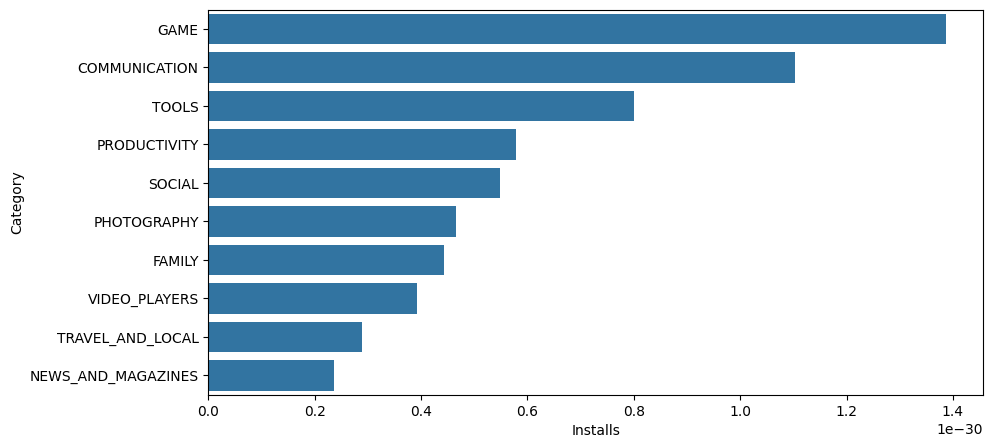

In [122]:
plt.figure(figsize = (10,5))

sns.barplot(x = "Installs", y = "Category", data = df2)
plt.show()

In [123]:
# top 5 app in categories 

In [124]:
apps = ["GAME", "COMMUNICATION", "TOOLS", "PRODUCTIVITY", "SOCIAL"]

In [128]:
df_app_category = df_clean.groupby(["Category", "App"])["Installs"].sum().reset_index()

In [129]:
df_app_category

,Category,App,Installs
0,ART_AND_DESIGN,350 Diy Room Decor Ideas,10000.0
1,ART_AND_DESIGN,3D Color Pixel by Number - Sandbox Art Coloring,100000.0
2,ART_AND_DESIGN,AJ Styles HD Wallpapers,5000.0
3,ART_AND_DESIGN,AJ Styles Wallpaper 2018 - AJ Styles HD Wallpaper,1000.0
4,ART_AND_DESIGN,Ai illustrator viewer,100000.0
...,...,...,...
9654,WEATHER,Yahoo Weather,10000000.0
9655,WEATHER,Yahoo! Weather for SH Forecast for understandi...,1000000.0
9656,WEATHER,Yandex.Weather,10000000.0
9657,WEATHER,weather - weather forecast,1000000.0


In [131]:
df_app_category = df_app_category.sort_values("Installs", ascending = False)

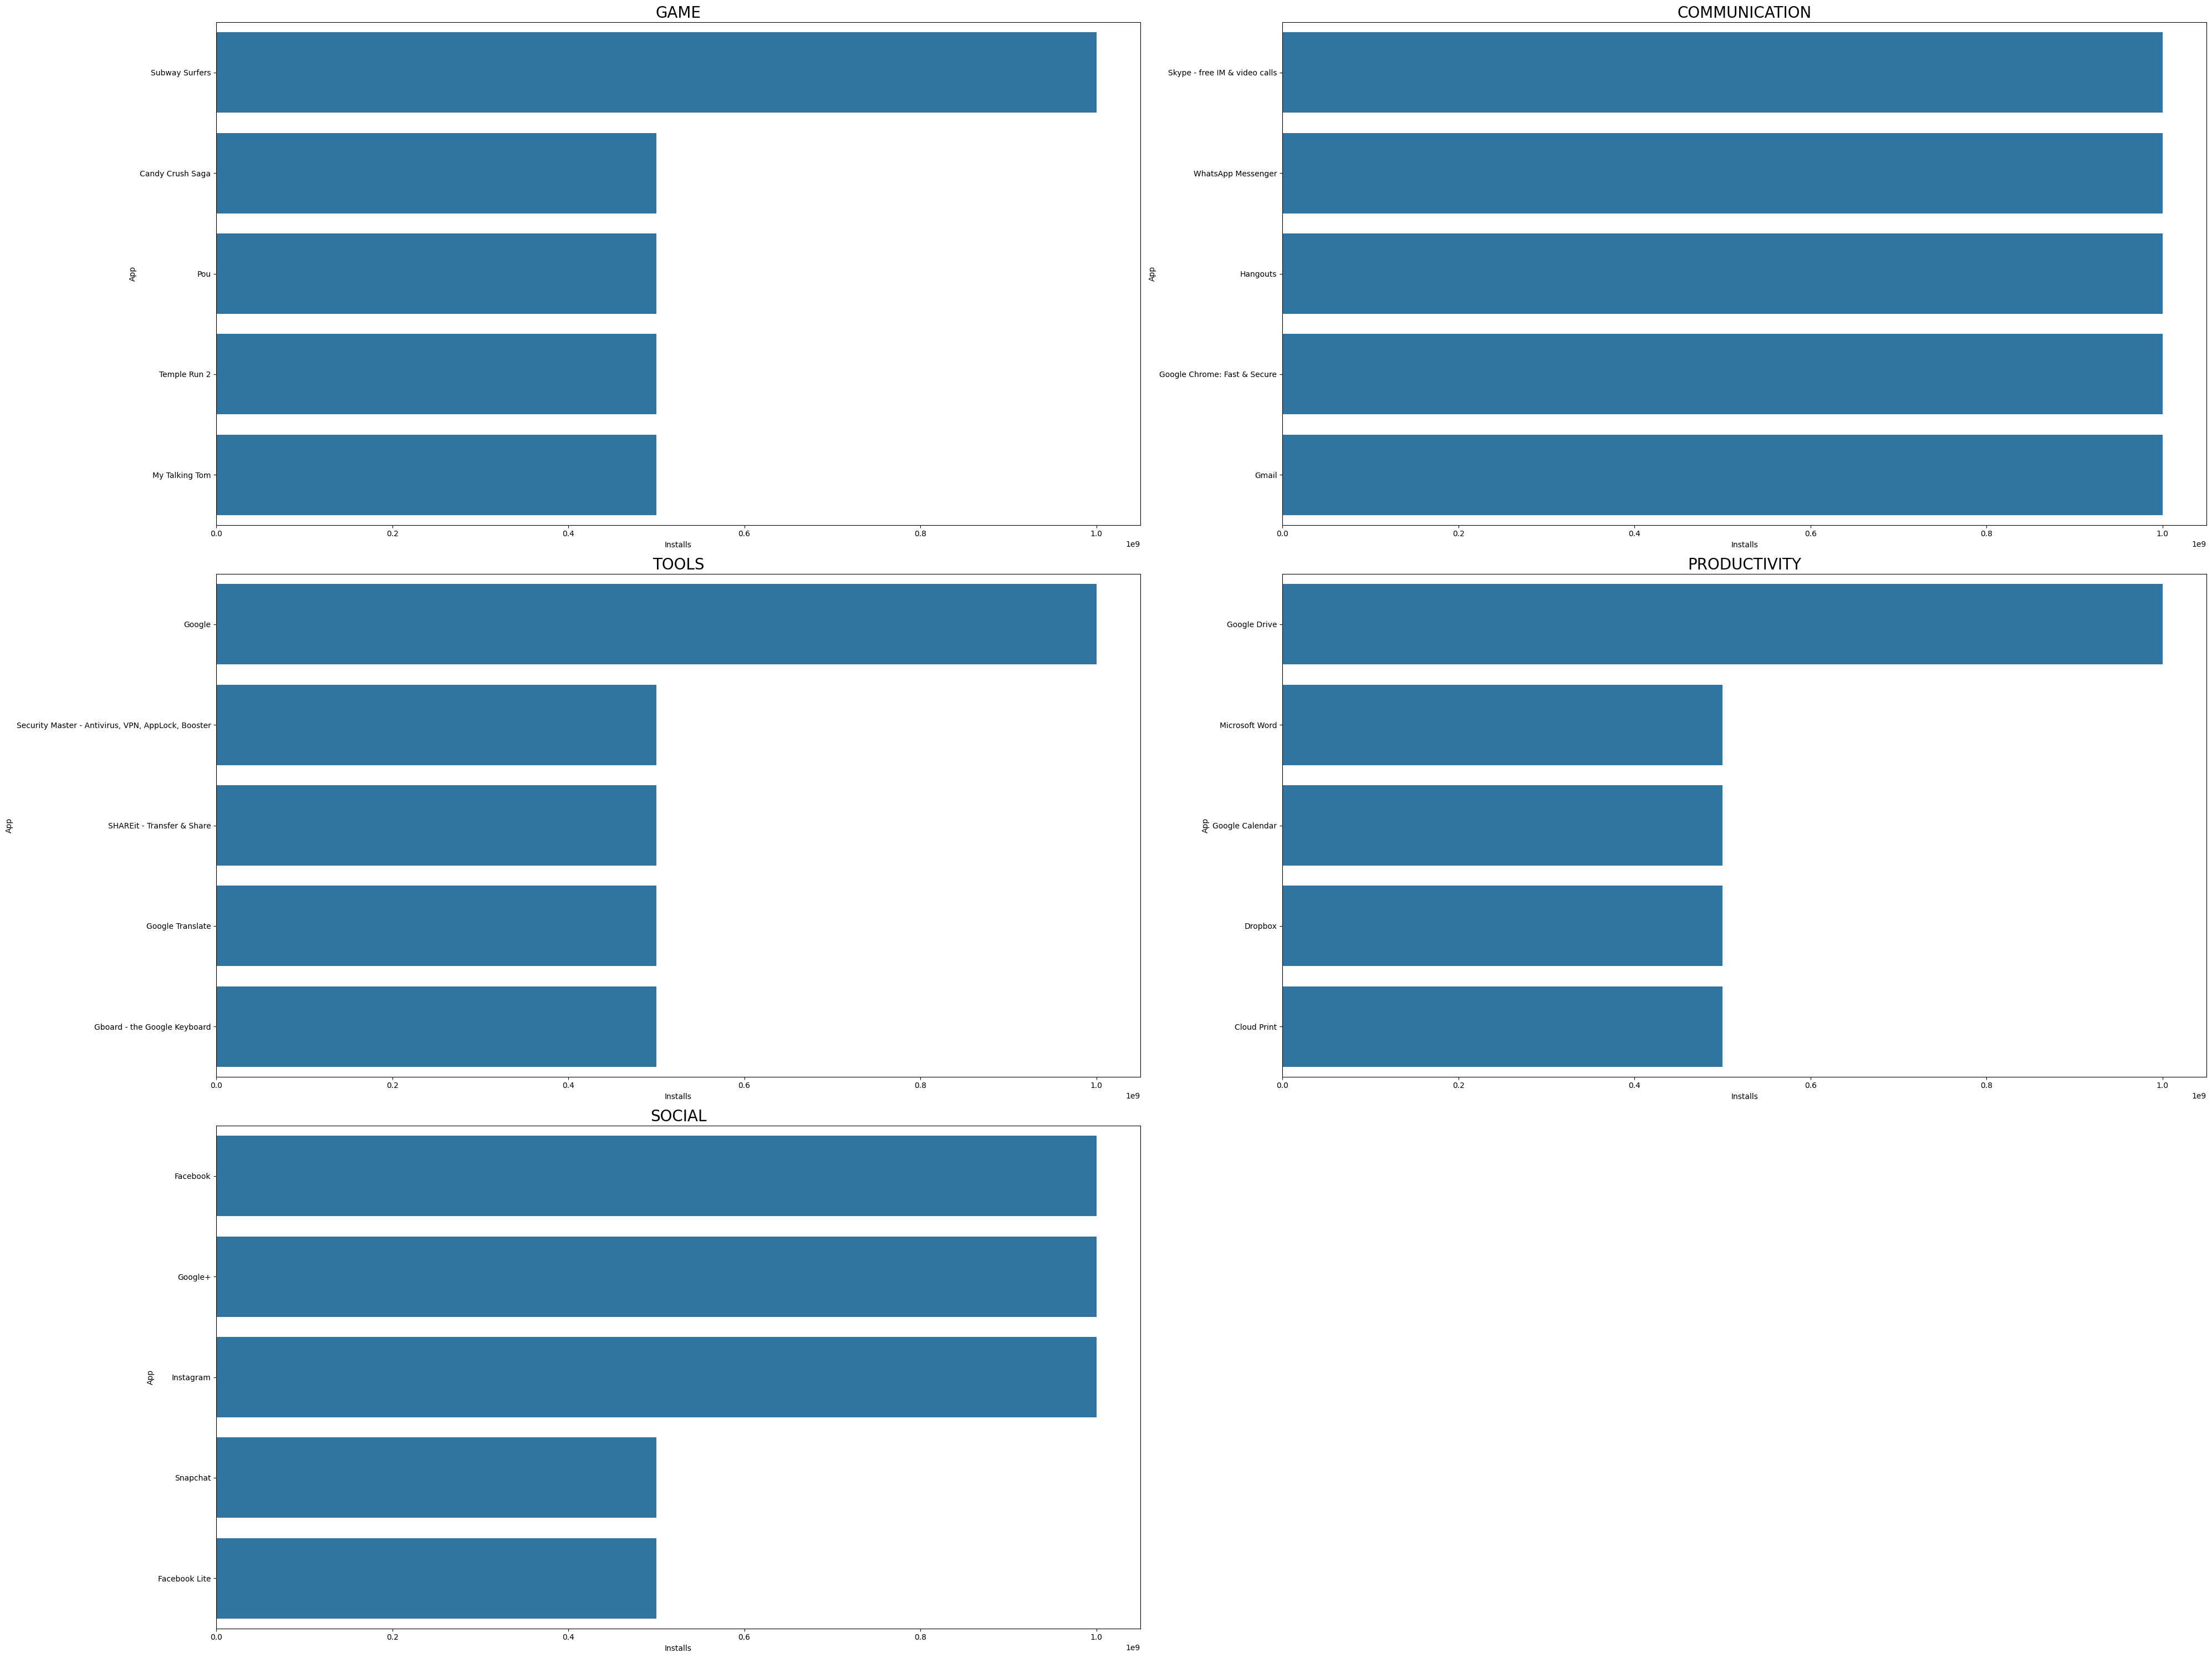

In [138]:
apps = ["GAME", "COMMUNICATION", "TOOLS", "PRODUCTIVITY", "SOCIAL"]
plt.figure(figsize = (40,30))
for i, app in enumerate(apps): 
    df2 = df_app_category[df_app_category["Category"] == app]
    df2 = df2.head(5)
    #print df2 

    plt.subplot(3,2,i+1)
    sns.barplot(data = df2, x = "Installs", y = "App")
    plt.title(app, size = 20)

plt.tight_layout()
plt.show()

In [139]:
# 5 rating apps 

In [143]:
rating_df = df_clean.groupby(["Category", "App", "Installs"])["Rating"].sum().sort_values(ascending = False).reset_index()

In [144]:
rating_df

,Category,App,Installs,Rating
0,FAMILY,WPBS-DT,500.0,5.0
1,FAMILY,BV Sridhara Maharaj,100.0,5.0
2,GAME,211:CK,10.0,5.0
3,BUSINESS,Ag Valley Cooperative,500.0,5.0
4,LIFESTYLE,Tafsiir Quraan MP3 Af Soomaali Quraanka Kariimka,1000.0,5.0
...,...,...,...,...
9654,TOOLS,BS Match Maker Premium,10.0,0.0
9655,FAMILY,Car Driving Theory Test BC,10.0,0.0
9656,TOOLS,BRL AG,100.0,0.0
9657,FINANCE,FP Markets,100.0,0.0


In [147]:
top_rated_apps = rating_df[rating_df["Rating"] == 5]

In [149]:
top_rated_apps

,Category,App,Installs,Rating
0,FAMILY,WPBS-DT,500.0,5.0
1,FAMILY,BV Sridhara Maharaj,100.0,5.0
2,GAME,211:CK,10.0,5.0
3,BUSINESS,Ag Valley Cooperative,500.0,5.0
4,LIFESTYLE,Tafsiir Quraan MP3 Af Soomaali Quraanka Kariimka,1000.0,5.0
...,...,...,...,...
266,TOOLS,Dr. ES PV Calculator,500.0,5.0
267,FAMILY,CB Register,10.0,5.0
268,LIFESTYLE,EG India,100.0,5.0
269,LIFESTYLE,EU Exit poll,100.0,5.0


In [150]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          8196 non-null   float64       
 3   Reviews         9659 non-null   int64         
 4   Size            8432 non-null   float64       
 5   Installs        9659 non-null   float64       
 6   Type            9658 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9651 non-null   object        
 12  Android Ver     9657 non-null   object        
 13  Day             9659 non-null   int32         
 14  Month           9659 non-null   int32         
 15  Year    

In [151]:
df_clean["Android Ver"]

0              4.0.3 and up
1              4.0.3 and up
2              4.0.3 and up
3                4.2 and up
4                4.4 and up
                ...        
10836            4.1 and up
10837            4.1 and up
10838            2.2 and up
10839    Varies with device
10840    Varies with device
Name: Android Ver, Length: 9659, dtype: object

In [152]:
df_clean["Android Ver"] = df_clean["Android Ver"].replace("and up", "", regex = True)

In [153]:
df_clean["Android Ver"]

0                    4.0.3 
1                    4.0.3 
2                    4.0.3 
3                      4.2 
4                      4.4 
                ...        
10836                  4.1 
10837                  4.1 
10838                  2.2 
10839    Varies with device
10840    Varies with device
Name: Android Ver, Length: 9659, dtype: object

In [154]:
df_clean["Android Ver"] = df_clean["Android Ver"].replace("Varies with device", np.nan, regex = True)

In [155]:
df_clean["Android Ver"].unique()

array(['4.0.3 ', '4.2 ', '4.4 ', '2.3 ', '3.0 ', '4.1 ', '4.0 ', '2.3.3 ',
       nan, '2.2 ', '5.0 ', '6.0 ', '1.6 ', '1.5 ', '2.1 ', '7.0 ',
       '5.1 ', '4.3 ', '4.0.3 - 7.1.1', '2.0 ', '3.2 ', '4.4W ', '7.1 ',
       '7.0 - 7.1.1', '8.0 ', '5.0 - 8.0', '3.1 ', '2.0.1 ',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 ', '2.2 - 7.1.1', '5.0 - 7.1.1'],
      dtype=object)

In [156]:
df_clean["Android Ver"] = df_clean["Android Ver"].replace("W", np.nan, regex = True)

In [157]:
df_clean["Android Ver"].value_counts()

Android Ver
4.1              2202
4.0.3            1395
4.0              1285
4.4               818
2.3               616
5.0               512
4.2               372
2.3.3             273
2.2               239
3.0               231
4.3               221
2.1               133
1.6               116
6.0                54
7.0                42
3.2                36
2.0                32
5.1                22
1.5                20
3.1                10
2.0.1               7
8.0                 6
7.1                 3
4.0.3 - 7.1.1       2
5.0 - 8.0           2
1.0                 2
7.0 - 7.1.1         1
4.1 - 7.1.1         1
5.0 - 6.0           1
2.2 - 7.1.1         1
5.0 - 7.1.1         1
Name: count, dtype: int64

In [158]:
df_clean = df_clean[df_clean["Android Ver"].str.contains("-") == False]

In [160]:
df_clean["Android Ver"].value_counts()

Android Ver
4.1       2202
4.0.3     1395
4.0       1285
4.4        818
2.3        616
5.0        512
4.2        372
2.3.3      273
2.2        239
3.0        231
4.3        221
2.1        133
1.6        116
6.0         54
7.0         42
3.2         36
2.0         32
5.1         22
1.5         20
3.1         10
2.0.1        7
8.0          6
7.1          3
1.0          2
Name: count, dtype: int64

In [161]:
# encoding

In [162]:
df_clean.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
10834,FR Calculator,FAMILY,4.0,7,2.6,500.0,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1,18,6,2017
10835,FR Forms,BUSINESS,NaN,0,9.6,10.0,Free,0.0,Everyone,Business,2016-09-29,1.1.5,4.0,29,9,2016
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000.0,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1,25,7,2017
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100.0,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1,6,7,2018
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000.0,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2,20,1,2017


In [163]:
mean_genres_install = df_clean.groupby(["Genres"])["Installs"].mean() / 1000000

In [164]:
mean_genres_install

Genres
Action                                   11.255844
Action;Action & Adventure                 3.910955
Adventure                                 4.064319
Adventure;Action & Adventure             21.230000
Adventure;Brain Games                     0.100000
                                           ...    
Video Players & Editors                   7.093219
Video Players & Editors;Creativity        5.000000
Video Players & Editors;Music & Video     5.000000
Weather                                   2.270176
Word                                      5.208628
Name: Installs, Length: 117, dtype: float64

In [165]:
mean_genres_install = mean_genres_install.to_dict()

In [166]:
mean_genres_install

{'Action': 11.255844429065743,
 'Action;Action & Adventure': 3.9109545454545454,
 'Adventure': 4.064319452054795,
 'Adventure;Action & Adventure': 21.23,
 'Adventure;Brain Games': 0.1,
 'Adventure;Education': 10.0,
 'Arcade': 20.65941643930636,
 'Arcade;Action & Adventure': 2.7084616153846155,
 'Arcade;Pretend Play': 1.0,
 'Art & Design': 1.8308589285714287,
 'Art & Design;Action & Adventure': 0.1,
 'Art & Design;Creativity': 0.285,
 'Art & Design;Pretend Play': 0.5,
 'Auto & Vehicles': 0.5828585844155845,
 'Beauty': 0.303941,
 'Board': 2.859415641025641,
 'Board;Action & Adventure': 2.001666666666667,
 'Board;Brain Games': 0.5254733333333333,
 'Board;Pretend Play': 0.0001,
 'Books & Reference': 0.6850892182741116,
 'Books & Reference;Creativity': 0.0001,
 'Books & Reference;Education': 0.0055,
 'Business': 1.0373904274611399,
 'Card': 2.200636585365854,
 'Card;Action & Adventure': 5.5,
 'Casino': 2.980018918918919,
 'Casual': 17.919875741935485,
 'Casual;Action & Adventure': 4.9091818

In [167]:
df_clean["Genres Encoded"] = df_clean["Genres"].map(mean_genres_install)

/var/folders/1y/frr84d_s6zl1wzpcm_29932r0000gn/T/ipykernel_56017/3611737003.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Genres Encoded"] = df_clean["Genres"].map(mean_genres_install)


In [168]:
df_clean

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year,Genres Encoded
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3,7,1,2018,1.830859
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,15,1,2018,0.500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3,1,8,2018,1.830859
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2,8,6,2018,1.830859
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4,20,6,2018,0.285000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6,500.0,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1,18,6,2017,0.360664
10835,FR Forms,BUSINESS,NaN,0,9.6,10.0,Free,0.0,Everyone,Business,2016-09-29,1.1.5,4.0,29,9,2016,1.037390
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000.0,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1,25,7,2017,0.360664
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100.0,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1,6,7,2018,0.360664


In [169]:
df_clean["Genres Encoded"]

0        1.830859
1        0.500000
2        1.830859
3        1.830859
4        0.285000
           ...   
10834    0.360664
10835    1.037390
10836    0.360664
10837    0.360664
10838    0.093449
Name: Genres Encoded, Length: 8647, dtype: float64